# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [5]:
# Import your libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [6]:
# Your code here
mu, sigma = 50, 5

sample_size = pd.Series([10, 50, 500, 5000, 50000])

dists = sample_size.apply(lambda s: np.random.normal(mu, sigma, s))

tests = dists.apply(lambda d: stats.normaltest(d))

tests

0     (3.965059771883677, 0.13772037935989956)
1     (2.468298321923712, 0.29108232123876465)
2     (0.9181726509341744, 0.6318606968752961)
3    (4.4176952085587295, 0.10982713994350315)
4     (1.8845741555442266, 0.3897354599740378)
dtype: object

#### Interpret the normaltest results and make your observations.

In [7]:
# Explain the test results here
La función stats.normaltest(x) prueba cuanto difiere una muestra de datos x de una distribucion normal.
Para ello, la función prueba la hipótesis nula al respecto de si la muestra proviene de un dataset que 
posee una distribución normal. La salida de la función es una tupla con dos valores numéricos que representan:
    tupla[0]: la suma de los cuadrados de los test de simetría y curtosidad.
    tupla[1]: el p-value.
Debido a que la función pretende probar la hipótesis nula, cuanto menor sea el valor de p-value, menor es la
probabilidad de que la distribución de datos NO sea normal, por tanto la distribución de datos es normal.
Las muestras que se analizan en el ejemplo, son muestras de diferente tamaño pero que se generan a partir de
una función que genera valores aleatorios que deben cumplir una distribución normal, por lo que se espera 
un valor de p-value bajo en todos los casos. Sin embargo, el resultado varía significativamente cada vez que 
se ejecuta el código para las diferentes dimensiones de muestras.

SyntaxError: invalid syntax (<ipython-input-7-b41c6c73ea4d>, line 2)

#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](ch-1.png)

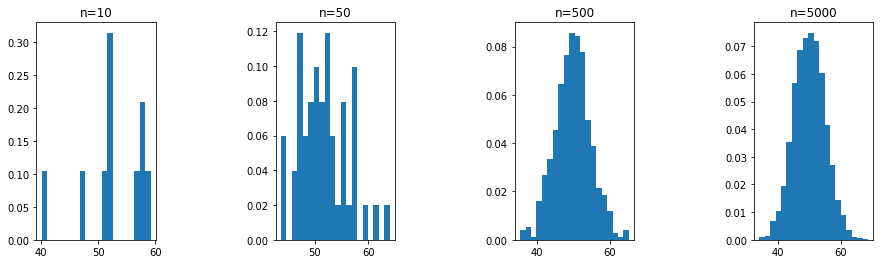

In [8]:
# Your code here
f, ax = plt.subplots(1, 4)

f.set_figwidth(15)

f.subplots_adjust(wspace=1)

for i in range(0, 4):
    ax[i].set_title('n=%s' % (sample_size[i]))
    count, bins, ignored = ax[i].hist(dists[i], 20, density=True)

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

In [9]:
# Your comment and explanation here
En los histogramas se puede observar como la media de cada una de las muestras varía en torno al valor 50 
de forma que se cumple el central limit theorem que implica que según se aumente el número de muestras
la media de las medias de las muestras eventualmente convergerá en un punto que será la media de la población.

SyntaxError: invalid syntax (<ipython-input-9-75f435228b9a>, line 2)

# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

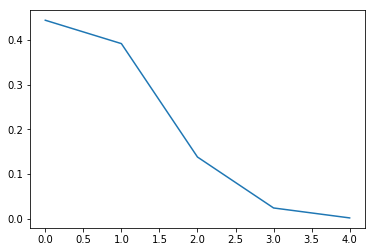

In [10]:
# Your code here
from scipy.stats import binom

n, p = 5, 0.15

x = range(n)

dist = binom(n, p)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

#### Explain what you observe from the plot above

In [11]:
# Your comment here
El gráfico de distribución binomial para una muestra de cinco individuos no es capaz de marcar el evento
(personas clicando en el ad) debido a que el 15% de 5 no es un valor discreto. Por tanto, la distribución 
binomial no tiene sentido.

SyntaxError: invalid syntax (<ipython-input-11-c47700e2129a>, line 2)

#### Now plot PMP with 50, 500, and 5000 visitors.

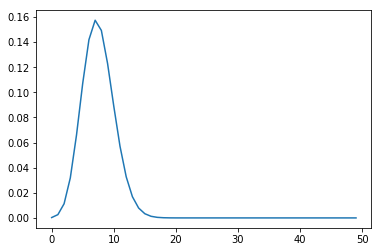

In [12]:
# Your code here

# con 50 visitas
n, p = 50, 0.15
x = range(n)
dist = binom(n, p)
fig, ax = plt.subplots(1, 1)
plt.plot(x, dist.pmf(x))
plt.show()

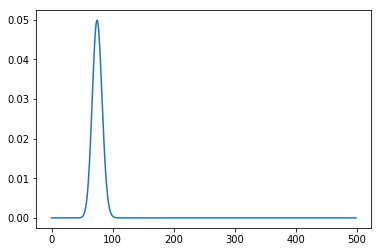

In [13]:
# con 500 visitas
n, p = 500, 0.15
x = range(n)
dist = binom(n, p)
fig, ax = plt.subplots(1, 1)
plt.plot(x, dist.pmf(x))
plt.show()

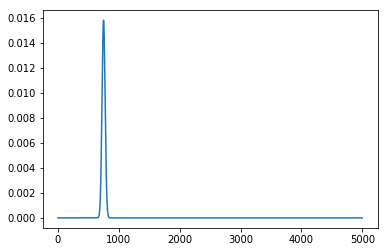

In [14]:
# con 5000 visitas
n, p = 5000, 0.15
x = range(n)
dist = binom(n, p)
fig, ax = plt.subplots(1, 1)
plt.plot(x, dist.pmf(x))
plt.show()

#### What did you notice from the distribution plots? Comment your findings.

In [ ]:
# Your comment here
Al aumentar el número de individuos, se puede observar como la distribución binomial marca con un 'pike' el 
punto donde se encuentra el número de personas que clicarían en la publicidad (15%). Cabe resaltar que este 
pike coverge más hacia un valor concreto según aumenta el tamaño de elementos de la muestra.

# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

In [ ]:
# Your comment here
La distribución de Poisson es una distribución de probabilidad discreta que expresa, a partir de una frecuencia 
de ocurrencia media, la probabilidad de que ocurra un determinado número de eventos durante cierto período de 
tiempo. Es decir, que conociendo el porcentaje de ocurrencia de un evento en un tiempo determinado, podemos 
calcular la probabilidad de que ocurra un número de dichos eventos en un tiempo dado.

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [23]:
# Your code here
from scipy.stats import poisson
#pmf(k, mu, loc=0)
#mu: media del evento en un periodo.
#k: valor de ocurrencia del cual se quiere conocer su probabilidad de ocurrencia.
print(poisson.pmf(320, 300))

0.011612348610402475


#### What is the probability of getting 60 visits?

In [26]:
# Your code here
print(poisson.pmf(300, 300))

0.023026546149191047


#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

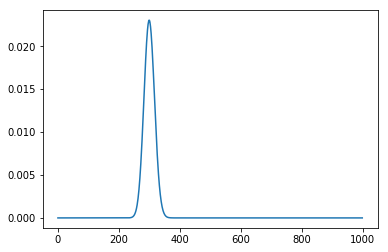

In [15]:
# your code here
from scipy.stats import poisson

N = np.arange(1000)

rv = poisson(300)

arr = []

for n in N:
    arr.append(rv.pmf(n))

plt.plot(arr)